In [19]:
import pandas as pd
import country_list

In [20]:
covid_data = pd.read_csv('owid-covid-data.csv', sep = ',')

In [21]:
covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388894,ZWE,Africa,Zimbabwe,2024-03-20,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388895,ZWE,Africa,Zimbabwe,2024-03-21,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388896,ZWE,Africa,Zimbabwe,2024-03-22,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388897,ZWE,Africa,Zimbabwe,2024-03-23,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


### Dimensioni del dataset e i relativi metadati

In [22]:
dimensioni = covid_data.shape
print("Le dimensioni del DataFrame sono le seguenti:", dimensioni)

Le dimensioni del DataFrame sono le seguenti: (388899, 67)


In [23]:
#facendo covid_data.info() riesco ad ottenere informazioni più dettagliate, incluso il tipo di dato di ciascuna colonna
metadati = covid_data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388899 entries, 0 to 388898
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    388899 non-null  object 
 1   continent                                   370315 non-null  object 
 2   location                                    388899 non-null  object 
 3   date                                        388899 non-null  object 
 4   total_cases                                 350041 non-null  float64
 5   new_cases                                   377974 non-null  float64
 6   new_cases_smoothed                          376744 non-null  float64
 7   total_deaths                                327775 non-null  float64
 8   new_deaths                                  378290 non-null  float64
 9   new_deaths_smoothed                         377060 non-null  float64
 

## Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [24]:
# è una lista che contiene i nomi degli stati del mondo in maniera univoca.
lista_stati_del_mondo = [country[1] for country in country_list.countries_for_language('en')]
lista_stati_del_mondo

['Afghanistan',
 'Åland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua & Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia & Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Caribbean Netherlands',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Colombia',
 'Comoros',
 'Congo - Brazzaville',
 'Congo - Kinshasa',
 'Cook Islands',
 'Costa Rica',
 'Côte d’Ivoire',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egyp

In [25]:
# è la lista degli stati unique presenti nel dataset nella colonna 'location'
lista_location = covid_data['location'].unique().tolist()
lista_location

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',

In [26]:
# si evince che gli stati presenti nel dataset sono diversi dagli stati del mondo
if lista_stati_del_mondo == lista_location:
    print("Le liste sono uguali.")
else:
    print("Le liste sono diverse.")

Le liste sono diverse.


In [27]:
# creo una lista chiamata new_list, che conterrà i nomi unici del dataset covid colonna 'location', che non sono presenti nella lista
# dei continenti del mondo. questo significa che i nomi contenuti in new_list sono da escludere dal dataset del covid.
new_list = []
for x in lista_location:
    if x not in lista_stati_del_mondo:
        new_list.append(x)

In [28]:
# filtro le righe del DataFrame che non contengono i nomi presenti in new_list
covid_data = covid_data[~covid_data['location'].isin(new_list)]

# ora il DataFrame covid_data contiene solo le righe che non contengono i nomi presenti in new_list

In [29]:
# converto la colonna 'date' in formato datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# trovo l'ultimo giorno di misurazione del totale dei casi per ogni continente
ultimo_giorno_per_continente = covid_data.groupby('continent')['date'].max()

# filtro il DataFrame in modo da includere solo le righe relative all'ultimo giorno disponibile per ogni continente
covid_data_ultimo_giorno = covid_data[covid_data['date'].isin(ultimo_giorno_per_continente)]

# raggruppo per continente e sommo i casi totali con groupby
casi_per_continente_ultimo_giorno = covid_data_ultimo_giorno.groupby('continent')['total_cases'].sum()

# stampo il numero totale di casi per ogni continente per l'ultimo giorno analizzato
print("Numero totale di casi per continente (ultimo giorno analizzato):")
print(casi_per_continente_ultimo_giorno)

Numero totale di casi per continente (ultimo giorno analizzato):
continent
Africa            12423547.0
Asia             300017759.0
Europe           251704606.0
North America    124161590.0
Oceania           14784136.0
South America     68718444.0
Name: total_cases, dtype: float64


/var/folders/nv/lpt443457zv966hm9g7l6bgw0000gn/T/ipykernel_3660/1490120421.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

In [30]:
# definisco i due continenti di interesse
continente_1 = 'Asia'
continente_2 = 'Europe'

# calcolo i totali dei casi per ciascun continente
totali_casi_per_continente = covid_data.groupby('continent')['total_cases'].sum()

# calcolo il totale dei casi nel mondo, incluso i casi senza indicazione di continente
totale_casi_nel_mondo = covid_data['total_cases'].sum()

# calcolo i totali dei casi per i due continenti specificati
totali_casi_continente_1 = totali_casi_per_continente[continente_1]
totali_casi_continente_2 = totali_casi_per_continente[continente_2]

# calcolo il massimo valore di casi per il continente 1
massimo_valore_continente_1 = round(totali_casi_continente_1.max(), 2)

# calcolo il massimo valore di casi per il continente 2
massimo_valore_continente_2 = round(totali_casi_continente_2.max(), 2)

# calcolo la media dei casi per i due continenti
media_casi_continente_1 = round(totali_casi_continente_1 / len(covid_data[covid_data['continent'] == continente_1]), 2)
media_casi_continente_2 = round(totali_casi_continente_2 / len(covid_data[covid_data['continent'] == continente_2]), 2)

# calcolo le percentuali dei casi rispetto al totale dei casi nel mondo
percentuale_casi_continente_1 = round((totali_casi_continente_1 / totale_casi_nel_mondo) * 100, 2)
percentuale_casi_continente_2 = round((totali_casi_continente_2 / totale_casi_nel_mondo) * 100, 2)

# stampo i risultati
print("Descrittori statistici per i continenti", continente_1, "e", continente_2, ":")
print("Massimo valore di casi per", continente_1, ":", massimo_valore_continente_1)
print("Massimo valore di casi per", continente_2, ":", massimo_valore_continente_2)
print("Media dei casi per", continente_1, ":", media_casi_continente_1)
print("Media dei casi per", continente_2, ":", media_casi_continente_2)
print("Percentuale dei casi rispetto al totale dei casi nel mondo per", continente_1, ":", percentuale_casi_continente_1)
print("Percentuale dei casi rispetto al totale dei casi nel mondo per", continente_2, ":", percentuale_casi_continente_2)


Descrittori statistici per i continenti Asia e Europe :
Massimo valore di casi per Asia : 210749778553.0
Massimo valore di casi per Europe : 202472217884.0
Media dei casi per Asia : 3046133.3
Media dei casi per Europe : 2792720.25
Percentuale dei casi rispetto al totale dei casi nel mondo per Asia : 34.57
Percentuale dei casi rispetto al totale dei casi nel mondo per Europe : 33.21


## Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

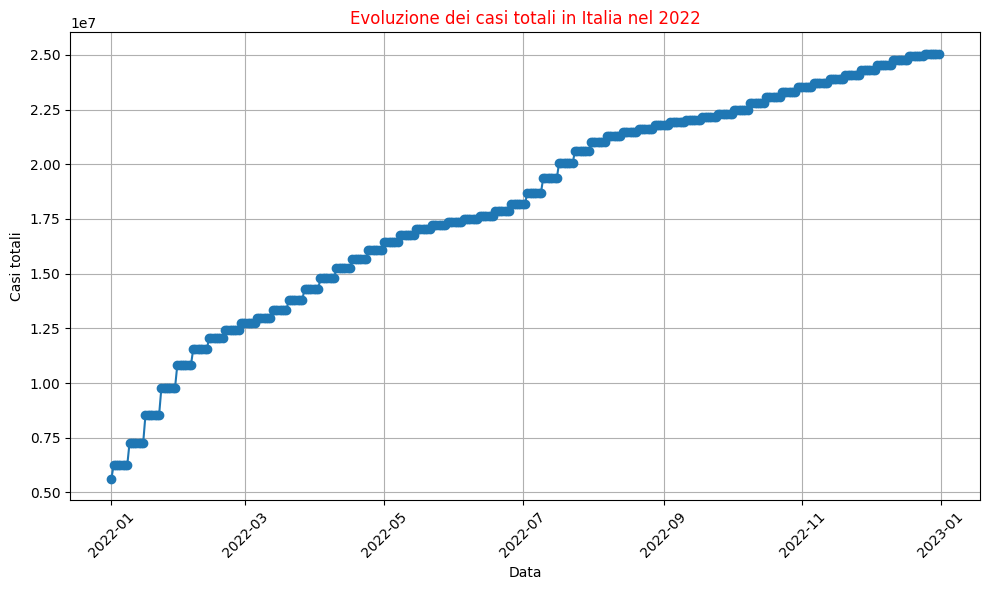

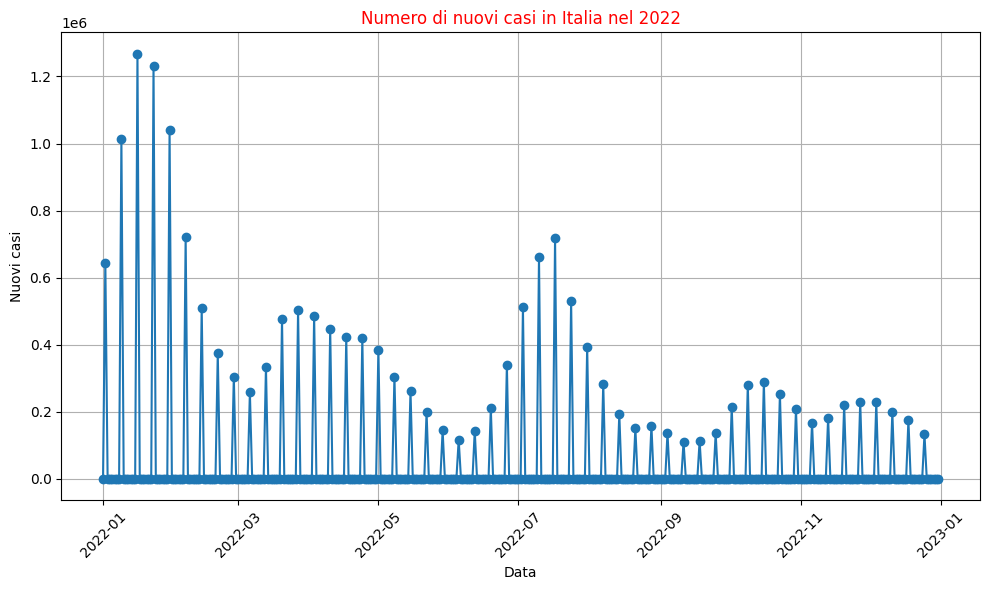

/var/folders/nv/lpt443457zv966hm9g7l6bgw0000gn/T/ipykernel_3660/1650378486.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



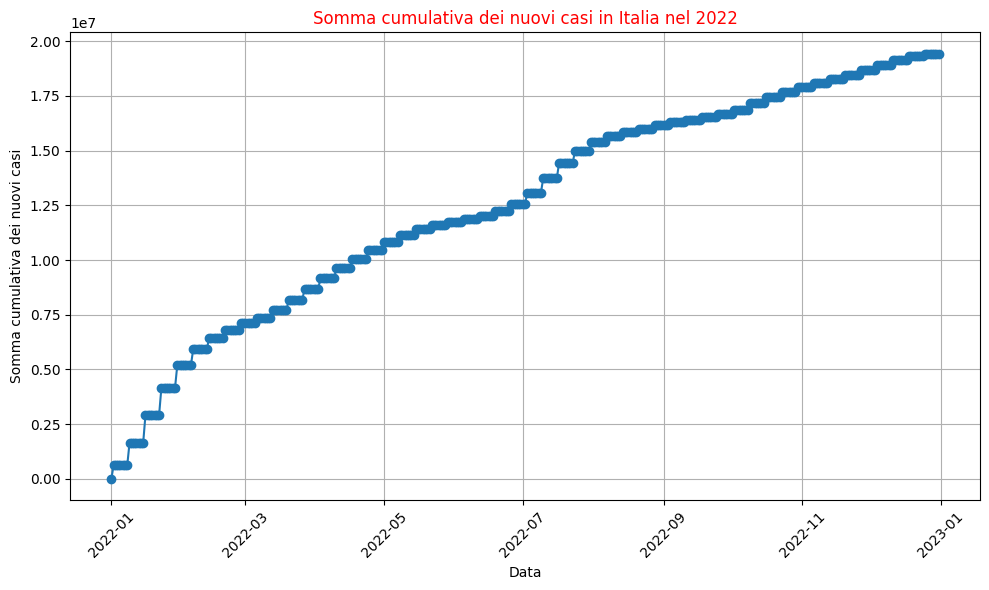

In [31]:
import matplotlib.pyplot as plt

# filtro i dati relativi all'Italia e all'anno 2022
italia_2022 = covid_data[(covid_data['location'] == 'Italy') & (covid_data['date'].dt.year == 2022)]

# creo un grafico per l'evoluzione dei casi totali
plt.figure(figsize=(10, 6))
plt.plot(italia_2022['date'], italia_2022['total_cases'], marker='o', linestyle='-')
plt.title('Evoluzione dei casi totali in Italia nel 2022', color = "red")
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# creo un grafico per il numero di nuovi casi rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(italia_2022['date'], italia_2022['new_cases'], marker='o', linestyle='-')
plt.title('Numero di nuovi casi in Italia nel 2022', color = "red")
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# calcolo la somma cumulativa dei nuovi casi per l'anno 2022
italia_2022['cumulative_new_cases'] = italia_2022['new_cases'].cumsum()

# creo un grafico per l'andamento della somma cumulativa dei nuovi casi
plt.figure(figsize=(10, 6))
plt.plot(italia_2022['date'], italia_2022['cumulative_new_cases'], marker='o', linestyle='-')
plt.title('Somma cumulativa dei nuovi casi in Italia nel 2022', color = "red")
plt.xlabel('Data')
plt.ylabel('Somma cumulativa dei nuovi casi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Commento: si notano similarità con il grafico dell'andamento del numero dei casi totali

## Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

In [32]:
import plotly.express as px

# filtro i dati per includere solo le righe relative a Italia, Germania e Francia
nazioni_selezionate = ['Italy', 'Germany', 'France']
filtro_nazioni = covid_data[covid_data['location'].isin(nazioni_selezionate)]

# filtro i dati per includere solo il periodo da maggio 2022 ad aprile 2023
filtro_periodo = filtro_nazioni[(filtro_nazioni['date'] >= '2022-05-01') & (filtro_nazioni['date'] <= '2023-04-30')]

# creo il boxplot con Plotly e specifica un colore diverso per ogni box
fig = px.box(filtro_periodo, x='location', y='icu_patients', color='location',
             labels={'location': 'Nazione', 'icu_patients': 'Numero di pazienti in terapia intensiva (ICU)'})

# aggiorno il layout per modificare lo stile del titolo
fig.update_layout(title_text='Distribuzione dei pazienti in terapia intensiva (ICU) da maggio 2022 ad aprile 2023',
                  title_font_color='green')
fig.show()

### Commento: grazie all'utilizzo del boxplot possiamo avere una visione interattiva della distribuzione dei pazienti in terapia intensiva nell'intervallo temporale da maggio 2022 ad aprile 2023. possiamo subito notare differenze sostanziali tra Francia, Germania e Italia. La Germania, rispetto agli altri 2 stati ha raggiunto il picco storico di circa 1850 casi. La Francia si trova al secondo posto con un picco di circa 1550. La media di entrambi questi due stati appena citati è simile: in media 1000 casi di ricovero in terapia intensiva. L'Italia si distacca completamente rispetto agli altri due, con una media di 227 e un picco storico di 430. Possiamo quindi concludere che l'andamento della distribuzione dei pazienti in terapia intensiva (ICU) da maggio 2022 ad aprile 2023 è simile tra Francia e Germania, mentre risulta essere molto più bassa in Italia, dove sono stati registrati sempre meno pazienti in terapia intensiva durante l'anno analizzato.

## Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [33]:
# filtro i dati per includere solo le righe relative a Italia, Germania, Francia e Spagna nel 2023
nazioni_selezionate = ['Italy', 'Germany', 'France', 'Spain']
filtro_nazioni_2023 = covid_data[(covid_data['location'].isin(nazioni_selezionate)) & (covid_data['date'].dt.year == 2023)]

# calcolo la somma dei pazienti ospitalizzati per ciascuna nazione
somma_pazienti_ospitalizzati = filtro_nazioni_2023.groupby('location')['hosp_patients'].sum()

# mostro la somma dei pazienti ospitalizzati per ogni nazione
print("Somma dei pazienti ospitalizzati per Italia, Germania, Francia e Spagna nel 2023:")
print(somma_pazienti_ospitalizzati)

# controllo se ci sono dati nulli
if filtro_nazioni_2023['hosp_patients'].isnull().any():
    print("Ci sono dati nulli nella colonna 'hosp_patients'.")
else:
    print("Non ci sono dati nulli nella colonna 'hosp_patients'.")

Somma dei pazienti ospitalizzati per Italia, Germania, Francia e Spagna nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64
Ci sono dati nulli nella colonna 'hosp_patients'.


## Commento: La Germania presenta dei valori nulli in 'hosp_patients' e non è possibile gestirli con sostituzione. Ma si potrebbe gestire questa mancanza con l'implementazione di modelli predittivi, come regressione o modelli di machine learning, per stimare i valori mancanti in base alle altre variabili nel dataset.